In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df_apps = pd.read_csv('datasets/apps.csv')

In [9]:
df_apps.drop(columns=[df_apps.columns[0]], inplace=True)

In [10]:
categories = df_apps['Category'].unique()

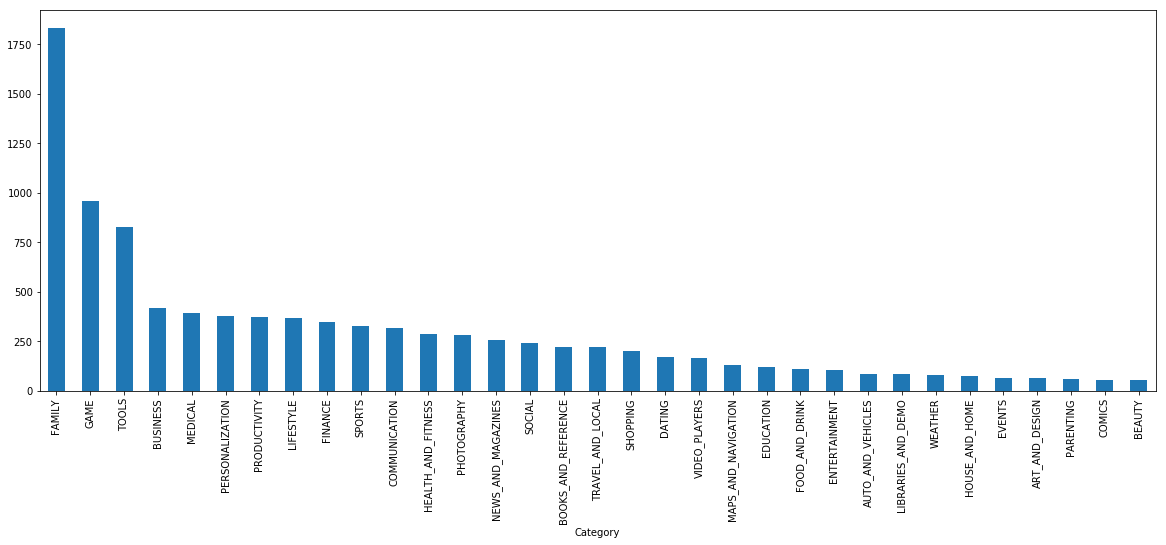

In [35]:
df_apps.groupby('Category').count().sort_values('App')['App'][::-1].plot(kind='bar', figsize = (20, 7))

In [41]:
df_apps['Type'].fillna('Free', inplace = True)

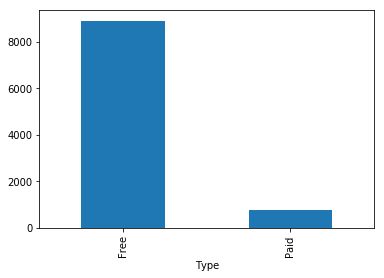

In [46]:
df_apps.groupby('Type').count()['App'].plot(kind="bar")